In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize,  LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from tensorflow.keras.utils import to_categorical
from tkinter import filedialog
from tkinter import Tk
from keras.callbacks import EarlyStopping

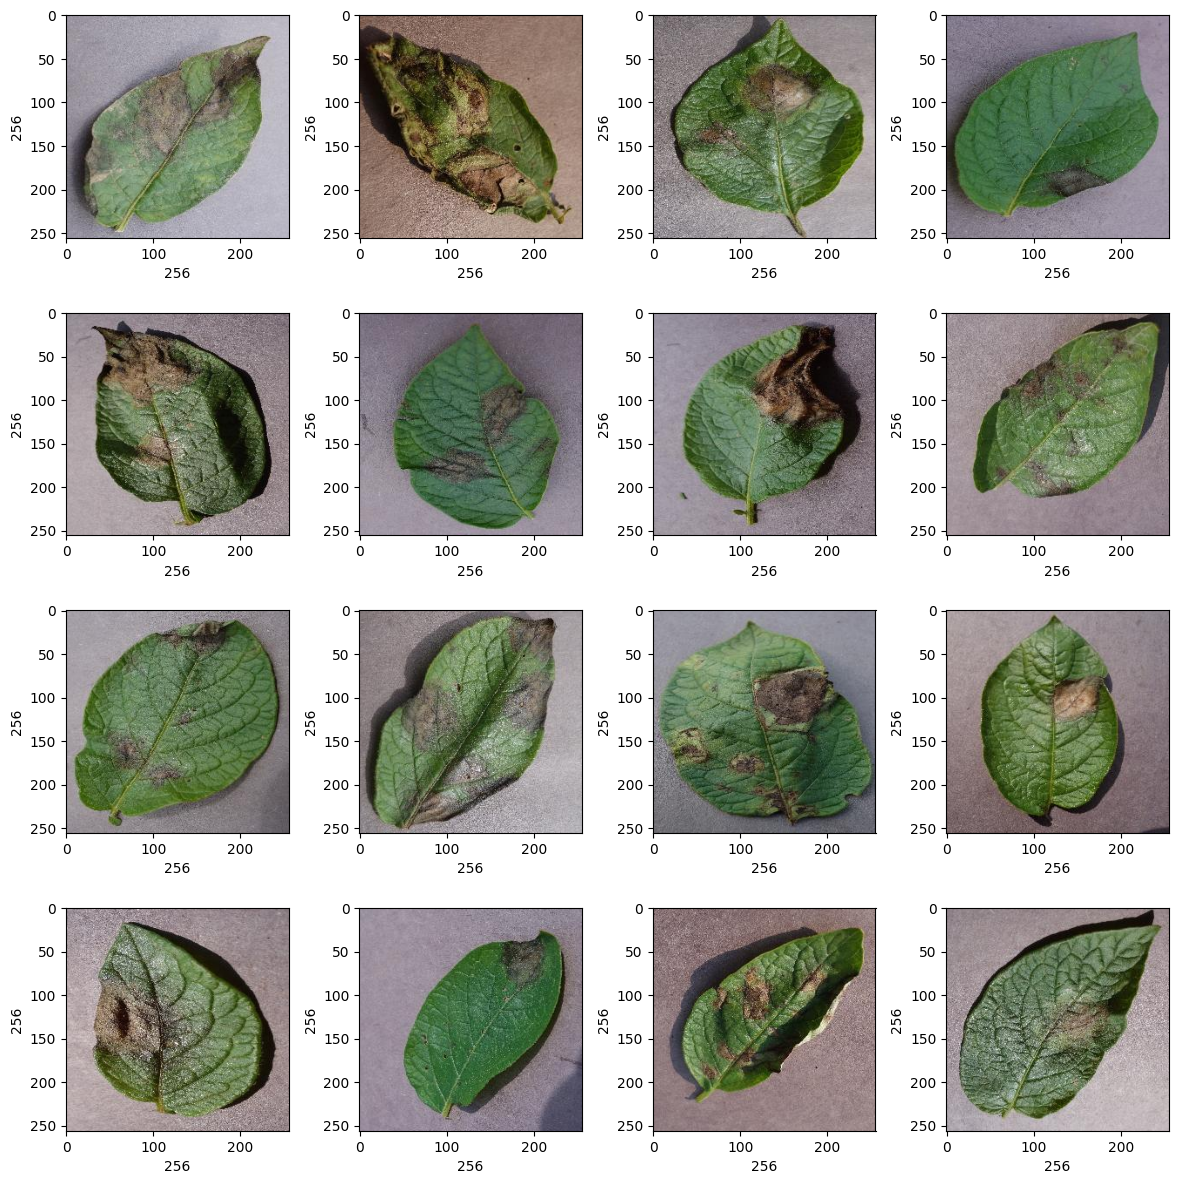

In [ ]:
# Plotting 12 images to check dataset
#Now we will observe some of the iamges that are their in our dataset. We will plot 12 images here using the matplotlib library.
plt.figure(figsize=(12,12))
path = "data/Potato_Late_Blight"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

In [ ]:
#Converting Images to array
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (256,256))
            #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [ ]:
dir = "data"
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['Potato_Late_Blight', 'Potato_Early_Blight', 'Potato_Bacterial_Wilt',]
binary_labels = [0,1,2]
temp = -1

# Reading and converting image to numpy array
#Now we will convert all the images into numpy array.

for directory in root_dir:
    # Check if the directory name is in all_labels
    if directory in all_labels:
        print(directory)
        plant_image_list = listdir(f"{dir}/{directory}")
        temp += 1  # Increment temp only if the directory is relevant
        for files in plant_image_list:
            image_path = f"{dir}/{directory}/{files}"
            image_list.append(convert_image_to_array(image_path))
            label_list.append(binary_labels[temp]) # Append the corresponding label
    else:
        print(f"Skipping directory: {directory}, not in all_labels")

Skipping directory: .ipynb_checkpoints, not in all_labels
Potato_Bacterial_Wilt
Potato_Early_Blight
Potato_Late_Blight


In [ ]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

#it is a balanced dataset as you can see

,count
0,
0,306
1,300
2,300


In [ ]:
#Next we will observe the shape of the image.
image_list[0].shape

(256, 256, 3)

In [ ]:
#Checking the total number of the images which is the length of the labels list.
label_list = np.array(label_list)
label_list.shape

(906,)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10)

In [ ]:
#Now we will normalize the dataset of our images. As pixel values ranges from 0 to 255 so we will divide each image pixel with 255 to normalize the dataset.
x_train = np.array(x_train, dtype=np.float32) / 225.0
x_test = np.array(x_test, dtype=np.float32) / 225.0
x_train = x_train.reshape( -1, 256,256,3)
x_test = x_test.reshape( -1, 256,256,3)

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
model = Sequential()
# First block
model.add(Conv2D(32, (3, 3), padding="same", input_shape=(256, 256, 3), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Second block
model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Third block
model.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Fully connected layers
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))  # Prevent overfitting
model.add(Dense(3, activation="softmax"))  # Output layer
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 254, 254, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 127, 127, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 125, 125, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 62, 62, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      58,982,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,271,459 (226.10 MB)

 Trainable params: 59,271,459 (226.10 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

In [ ]:
#Next we will split the dataset into validation and training data.
# Splitting the training data set into training and validation data sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

In [ ]:
# Training the model
epochs = 15
batch_size = 128


early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs,
                    validation_data = (x_val, y_val))

Epoch 1/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 304s 59s/step - accuracy: 0.3904 - loss: 1.2184 - val_accuracy: 0.4069 - val_loss: 1.0717
Epoch 2/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 318s 59s/step - accuracy: 0.3470 - loss: 1.1043 - val_accuracy: 0.2897 - val_loss: 1.0879
Epoch 3/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 322s 59s/step - accuracy: 0.4796 - loss: 1.0269 - val_accuracy: 0.5310 - val_loss: 1.0839
Epoch 4/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 323s 59s/step - accuracy: 0.5286 - loss: 1.0019 - val_accuracy: 0.6828 - val_loss: 1.0452
Epoch 5/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 319s 58s/step - accuracy: 0.6384 - loss: 0.9093 - val_accuracy: 0.7172 - val_loss: 0.9574
Epoch 6/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 322s 59s/step - accuracy: 0.6728 - loss: 0.7896 - val_accuracy: 0.5793 - val_loss: 0.8361
Epoch 7/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 318s 58s/step - accuracy: 0.6929 - loss: 0.6855 - val_accuracy: 0.6759 - val_loss: 0.7028
Epoch 8/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 323s 58s/step - accuracy: 0.7200 - loss: 0.6018 - val_accuracy: 0.7586 - val_loss:

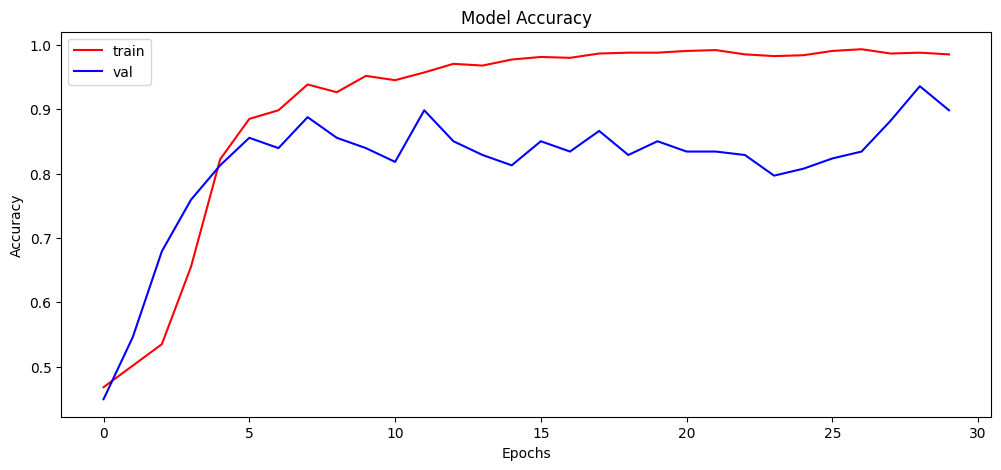

In [ ]:
#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [ ]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
8/8 ━━━━━━━━━━━━━━━━━━━━ 31s 4s/step - accuracy: 0.9425 - loss: 0.1291
Test Accuracy: 93.16239356994629


In [ ]:
y_pred = model.predict(x_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 33s 4s/step


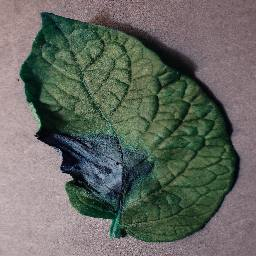

In [ ]:
# Plotting image to compare
img = array_to_img(x_test[20])
img

In [ ]:
 #Finding max value from predition list and comaparing original value vs predicted
print("Originally : ",all_labels[np.argmax(y_test[20])])
print("Predicted : ",all_labels[np.argmax(y_pred[20])])

Originally :  Potato_Late_Blight
Predicted :  Potato_Late_Blight


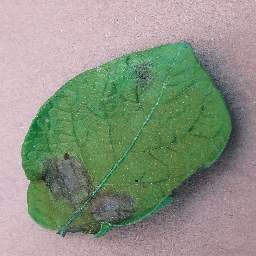

In [ ]:
img = array_to_img(x_test[143])
img

In [ ]:
print("Originally : ",all_labels[np.argmax(y_test[143])])
print("Predicted : ",all_labels[np.argmax(y_pred[143])])

Originally :  Potato_Late_Blight
Predicted :  Potato_Late_Blight


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


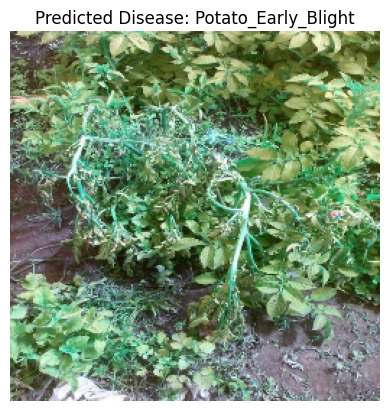

Prediction: Potato_Early_Blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


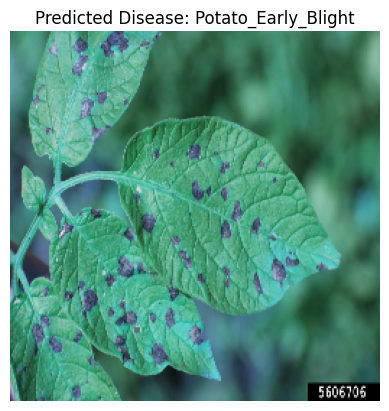

Prediction: Potato_Early_Blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


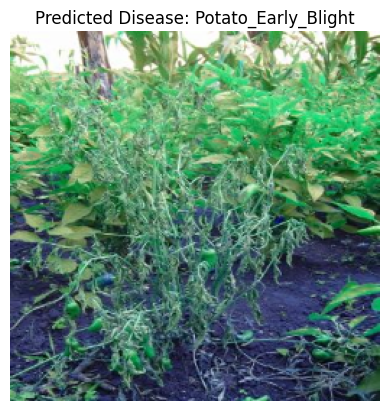

Prediction: Potato_Early_Blight


In [ ]:
def load_and_predict_image(model, all_labels,file_path):
    import cv2
    import numpy as np
    from keras.preprocessing.image import img_to_array, array_to_img

    # Hardcoded image path

    # Load and preprocess the image
    image = cv2.imread(file_path)
    if image is not None:
        image = cv2.resize(image, (256, 256))  # Resize image to match model input
        image = img_to_array(image)  # Convert to array
        image = np.expand_dims(image, axis=0)  # Add batch dimension
        image = image / 225.0  # Normalize

        # Predict using the model
        prediction = model.predict(image)
        predicted_label = all_labels[np.argmax(prediction)]

        # Display the image and prediction
        plt.imshow(array_to_img(image[0]))  # Convert back to PIL image for display
        plt.title(f"Predicted Disease: {predicted_label}")
        plt.axis('off')
        plt.show()
        print(f"Prediction: {predicted_label}")
    else:
        print("Error: Unable to load the image.")

# Call the function to test
load_and_predict_image(model, all_labels,"/content/drive/MyDrive/sample4.jpg")
load_and_predict_image(model, all_labels,"/content/drive/MyDrive/sample_dis.jpg")
load_and_predict_image(model, all_labels,"/content/drive/MyDrive/sample1.jpeg")